# Linear Algebra 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

## Affine Transformations

In [2]:
v = np.array([3,1])
v

array([3, 1])

In [3]:
import matplotlib.pyplot as plt
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)


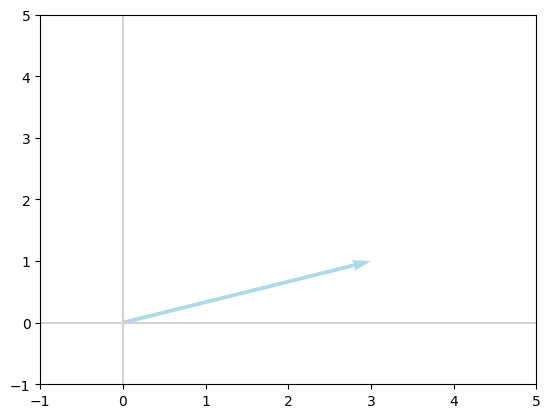

In [4]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

aplicar matriz à um vetor pode transformar linearmente um vetor.
aplicar uma Identity matrix a um vetor nao o transforma

In [5]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [6]:
Iv = np.dot(I,v)
Iv, v == Iv

(array([3, 1]), array([ True,  True]))

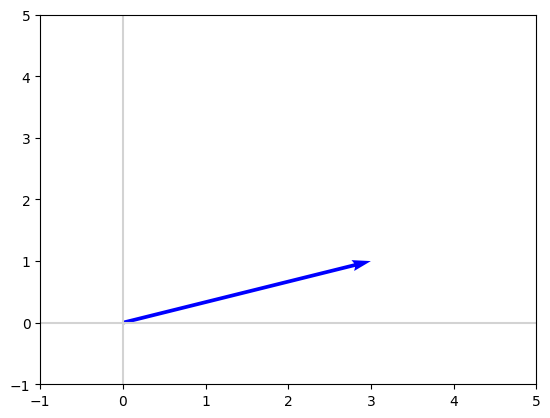

In [7]:
plot_vectors([Iv],['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In [8]:
E = np.array([[1,0],[0,-1]]) # esta matriz, em contraste, vira vetores over x-axis
E

array([[ 1,  0],
       [ 0, -1]])

In [9]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

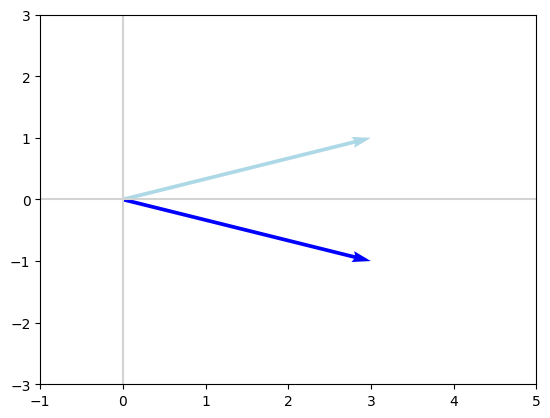

In [10]:
plot_vectors([v,Ev],['lightblue','blue'])
plt.xlim(-1,5)
_ = plt.ylim(-3,3)

In [11]:
F = np.array([[-1,0],[0,1]]) # flips over y-axis
F

array([[-1,  0],
       [ 0,  1]])

In [12]:
Fv = np.dot(F,v)
Fv

array([-3,  1])

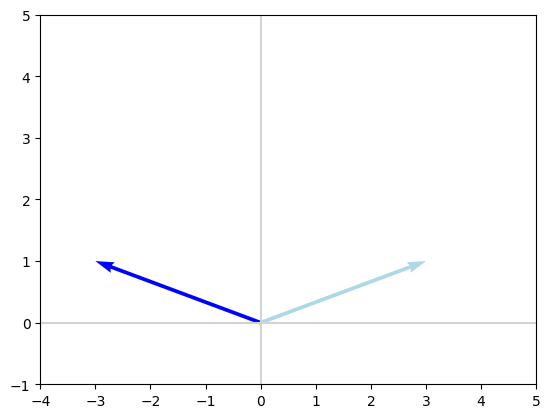

In [13]:
plot_vectors([v,Fv],['lightblue','blue'])
plt.xlim(-4,5)
_ = plt.ylim(-1,5)

**Affine transformation** = change in geometry que ajusta distancias ou angulos entre vetores.

Flipping matrix over an axis is called **reflection**. Outras affine transformations comuns:
- Scaling
- Shearing
- Rotation

Uma matriz pode aplicar múltiplas affine transformations simultaneamente.

In [14]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [15]:
Av = np.dot(A,v)
Av

array([1, 4])

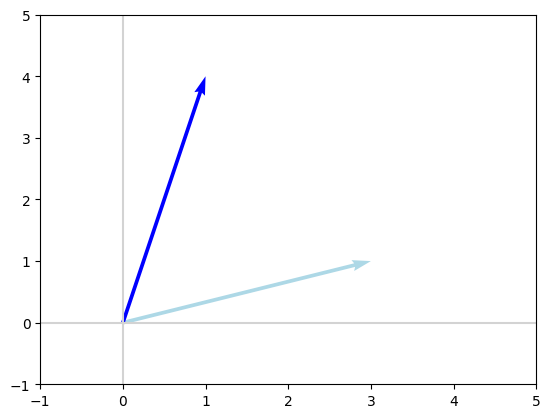

In [16]:
plot_vectors([v,Av],['lightblue','blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)
# v é lightblue, transformação é blue

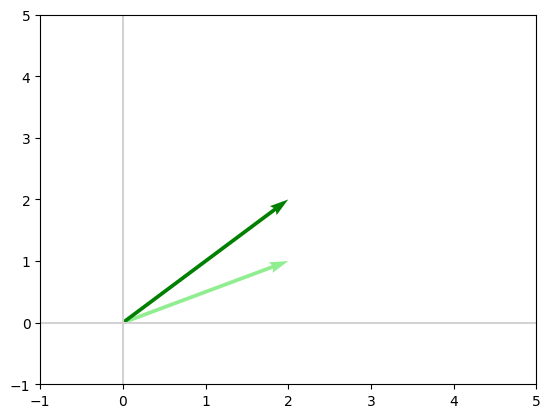

In [17]:
v2 = np.array([2,1])
plot_vectors([v2,np.dot(A,v2)],['lightgreen','green'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

Podemos concatenar vários vetores em uma matriz (digamos ***V***), onde cada coluna é um vetor.

Então qualquer transformação linear aplicada à ***V*** será aplicada independentemente para cada coluna (vetor)

In [18]:
v

array([3, 1])

In [19]:
np.matrix(v).T # transposta vira uma coluna

matrix([[3],
        [1]])

In [20]:
v3 = np.array([-3,-1]) #mirror image de v sobre os dois axis
v4 = np.array([-1,1])

In [21]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                  axis=1)
V


matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [22]:
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [23]:
AV = np.dot(A,V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [24]:
#converte coluna de matriz para vetor
def vectorfy(mtrx,clmn):
  return np.array(mtrx[:,clmn]).reshape(-1)

In [25]:
vectorfy(V,0), vectorfy(V,0) ==v

(array([3, 1]), array([ True,  True]))

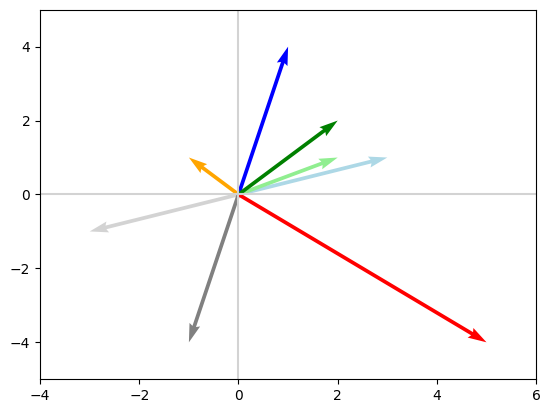

In [26]:
plot_vectors([vectorfy(V,0), vectorfy(V,1), vectorfy(V,2), vectorfy(V,3),
              vectorfy(AV,0), vectorfy(AV,1), vectorfy(AV,2), vectorfy(AV,3)],
               ['lightblue','lightgreen','lightgray','orange',
                'blue','green','gray','red'])
plt.xlim(-4,6)
_ = plt.ylim(-5,5)

## Eigenvectors and Eigenvalues

In [27]:
A

array([[-1,  4],
       [ 2, -2]])

In [28]:
lambdas, V = np.linalg.eig(A) # vector of eigenvalues e matriz de eig vetores

In [29]:
V #as many eigenvectors As columns of A

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [30]:
lambdas # eigenvalue

array([ 1.37228132, -4.37228132])

In [31]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

AVv = lambda*v

In [32]:
lambduh = lambdas[0] #lambda is a reserved term
lambduh

np.float64(1.3722813232690143)

In [33]:
Av = np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [34]:
lambduh * v

array([1.18031462, 0.70000958])

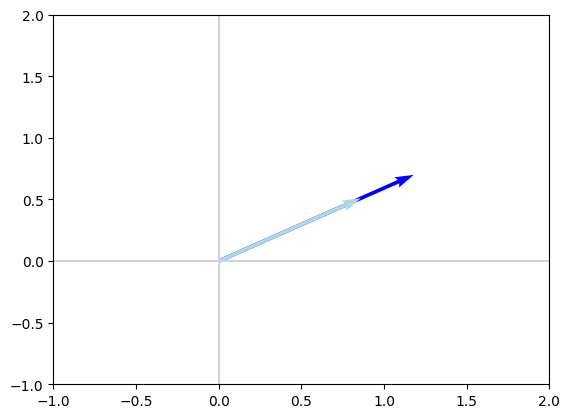

In [35]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
_ = plt.ylim(-1,2)

In [36]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [37]:
lambda2 = lambdas[1]
lambda2

np.float64(-4.372281323269014)

In [38]:
Av2 = np.dot(A,v2)
Av2

array([ 3.34281692, -2.81822977])

In [39]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

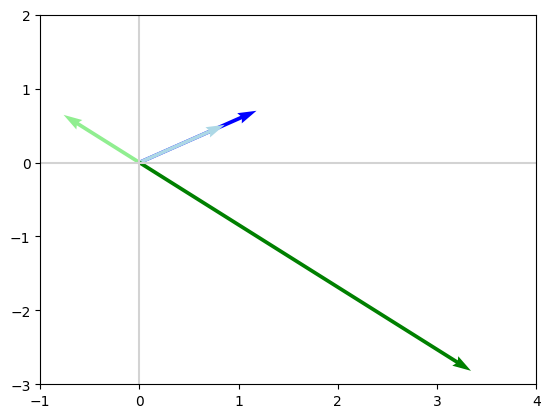

In [40]:
plot_vectors([Av,v,Av2,v2],['blue','lightblue','green','lightgreen'])
plt.xlim(-1,4)
_ = plt.ylim(-3,2)

In [41]:
A

array([[-1,  4],
       [ 2, -2]])

In [42]:
A_p = torch.tensor([[-1,  4], [ 2, -2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [43]:
eigenvals, eigenvecs = torch.linalg.eig(A_p)
eigenvals, eigenvecs

(tensor([ 1.3723+0.j, -4.3723+0.j]),
 tensor([[ 0.8601+0.j, -0.7645+0.j],
         [ 0.5101+0.j,  0.6446+0.j]]))

In [44]:
v_p = eigenvecs[:,0]
v_p

tensor([0.8601+0.j, 0.5101+0.j])

In [45]:
lambda_p = eigenvals[0]
lambda_p

tensor(1.3723+0.j)

In [46]:
Av_p = torch.matmul(A_p.to(v_p.dtype), v_p)
Av_p

tensor([1.1803+0.j, 0.7000+0.j])

In [47]:
lambda_p * v_p

tensor([1.1803+0.j, 0.7000+0.j])

In [48]:
v2_p = eigenvecs[1]
v2_p

tensor([0.5101+0.j, 0.6446+0.j])

In [49]:
lambda2_p = eigenvals[1]
lambda2_p

tensor(-4.3723+0.j)

In [50]:
Av2_p = torch.matmul(A_p.to(v_p.dtype), v2_p)
Av2_p

tensor([ 2.0682+0.j, -0.2689+0.j])

### Eigenvectors in >2 dimensions

In [51]:
X = np.array([[25,2,9],[5,26,-5],[3,7,-1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [52]:
lambdas_X, V_X = np.linalg.eig(X)

In [53]:
V_X # ONE eigenvec per column

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [54]:
lambdas_X

array([29.67623202, 20.62117365, -0.29740567])

X*v = lambda * v

In [55]:
v_X = V_X[:,0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [56]:
lambda_X = lambdas_X[0]
lambda_X

np.float64(29.676232023948902)

In [57]:
np.dot(X,v_X)

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [58]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

Xv = lambda*v

## Determinantes

### 2x2 Matrices

In [59]:
X = np.array([[4,2],[-5,-3]])
X

array([[ 4,  2],
       [-5, -3]])

In [60]:
np.linalg.det(X)

np.float64(-2.0000000000000013)

In [61]:
N = np.array([[-4,1],[-8,2]])
N

array([[-4,  1],
       [-8,  2]])

In [62]:
np.linalg.det(N) # NAO pode ser invertida

np.float64(0.0)

In [63]:
#Ninv = np.linalg.inv(N) # Singular matrix error

In [64]:
N = torch.tensor([[4,2],[-5,-3.]])

In [65]:
torch.det(N)

tensor(-2.)

### Determinant of Larger Matrices

In [66]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [67]:
np.linalg.det(X)

np.float64(19.999999999999996)

## Determinants and Eigenvalues

det(X) = produto de todos os eigenvalues de X

In [68]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [69]:
np.prod(lambdas)

np.float64(19.99999999999999)

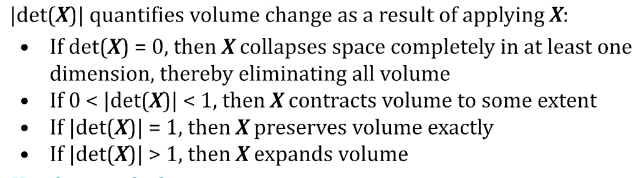

In [70]:
np.abs(np.linalg.det(X)) #increases the vplume of the tensor by 20

np.float64(19.999999999999996)

In [71]:
B = np.array([[1,0],[0,1]]) # some basis vectors
B

array([[1, 0],
       [0, 1]])

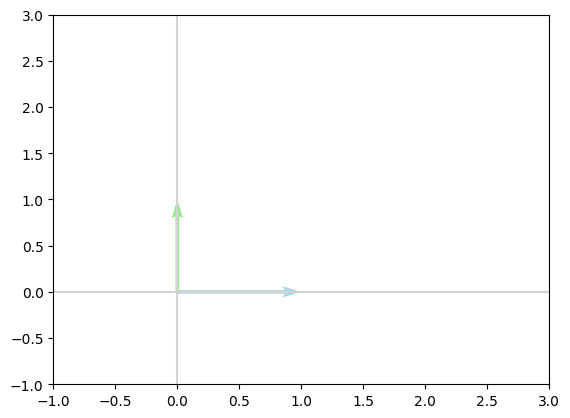

In [72]:
plot_vectors([vectorfy(B,0), vectorfy(B,1)],
             ['lightblue','lightgreen'])
plt.xlim(-1,3)
_ = plt.ylim(-1,3)

In [73]:
N = np.array([[-4,1],[-8,2]])
N

array([[-4,  1],
       [-8,  2]])

In [74]:
np.linalg.det(N)

np.float64(0.0)

In [75]:
NB = np.dot(N, B)
NB

array([[-4,  1],
       [-8,  2]])

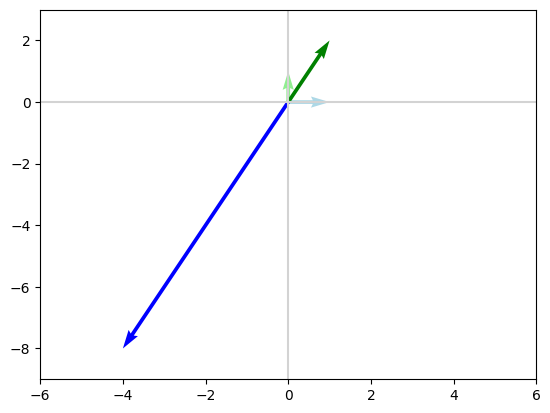

In [76]:
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(NB,0), vectorfy(NB,1)],
 ['lightblue','lightgreen','blue','green'])
plt.xlim(-6,6)
_ = plt.ylim(-9,3)
#nao tem mais volume

In [77]:
lambdas,V = np.linalg.eig(N)
lambdas # se um dos eigvalues da matriz é 0 , o produto de todos é 0

array([-2.,  0.])

com uma Matriz identidade..

In [78]:
I

array([[1, 0],
       [0, 1]])

In [79]:
np.linalg.det(I)

np.float64(1.0)

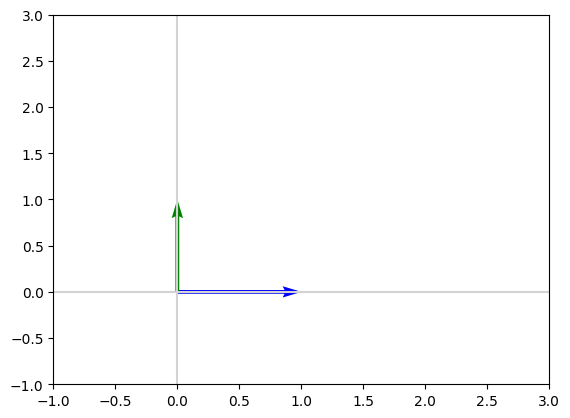

In [80]:
IB = np.dot(I,B)
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(IB,0), vectorfy(IB,1)],
 ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
_ = plt.ylim(-1,3)
# engual

agora outra matriz

In [81]:
J = np.array([[-0.5,0],[0,2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [82]:
np.linalg.det(J)

np.float64(-1.0)

In [83]:
np.abs(np.linalg.det(J))

np.float64(1.0)

In [84]:
JB = np.dot(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

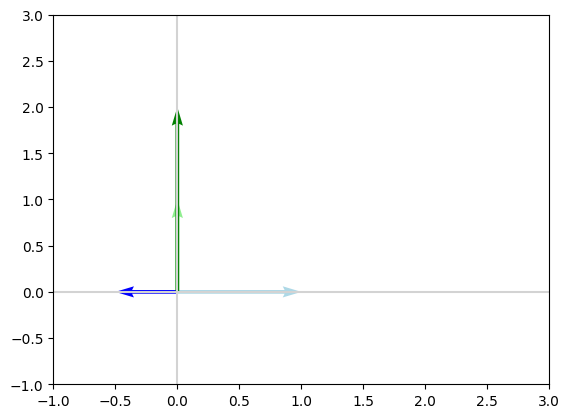

In [85]:
IB = np.dot(I,B)
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(JB,0), vectorfy(JB,1)],
 ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
_ = plt.ylim(-1,3)
# eigenvectors

In [86]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

D scales by doubling

In [87]:
D = I*2

In [88]:
np.linalg.det(D)

np.float64(4.0)

In [89]:
DB = np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

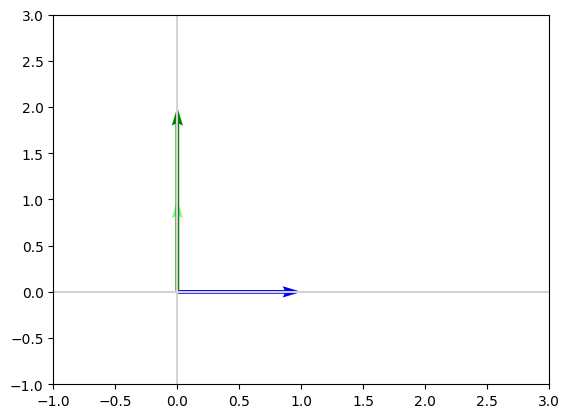

In [90]:
IB = np.dot(I,B)
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(B,0), vectorfy(DB,1)],
 ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
_ = plt.ylim(-1,3)
# scaled by doubling along both axes

In [91]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

## Eigendecomposition


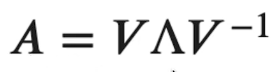



*   V é a concatenção de todos os eigenvectors de A
*   Λ (uppercase lambda) é a matriz diagonal diag(λ). A convenção é
  arranjar os valores lambda em ordem desc, com o **primeiro eigenvalue**
  sendo a **característica primária** da matriz A



In [92]:
A = np.array([[4,2],[-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [93]:
lambdas, V = np.linalg.eig(A)

In [94]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [95]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [96]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [97]:
np.dot(V, np.dot(Lambda,Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomp não é possível em todas as matrizes.

Em machine learning, geralmente matrizes possuem números reais. Se A é uma matriz real simétrica

A = Q.Λ.Q**T

onde Q é análogo à V e é uma matriz ortogonal

In [98]:
A = np.array([[2,1],[1,2]])
A

array([[2, 1],
       [1, 2]])

In [99]:
lambdas, Q = np.linalg.eig(A)
lambdas

array([3., 1.])

In [100]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [101]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [102]:
np.dot(Q,np.dot(Lambda,np.linalg.inv(Q)))

array([[2., 1.],
       [1., 2.]])

Q**TQ = QQ **T = I

In [103]:
np.dot(Q.T,Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [104]:
np.dot(Q,Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

# Matrix Operations for Machine Learning

## Singular Value Decomposition (SVD)

$A = UDV^T$

* $U$ is an orthogonal  $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.,
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.,
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [105]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [106]:
U, d, VT = np.linalg.svd(A) # V já está transposto

In [107]:
U # um vetor pra cada row

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [108]:
VT #row correspond to right singular vectors
# um vetor pra cada coluna

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [109]:
d # vetor de valor singular

array([8.66918448, 4.10429538])

In [110]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

D deve ter a mesma dimensao de A

In [111]:
D = np.concatenate((np.diag(d),[[0,0]]),axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [112]:
np.dot(U, np.dot(D,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD e eigendecomposition são similares.

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$

## Image Compression w/ SVD

In [113]:
from PIL import Image

In [114]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

--2026-01-13 15:23:39--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: ‘oboe-with-book.jpg’

oboe-with-book.jpg  100%[===================>] 409.73K  --.-KB/s    in 0.04s   

2026-01-13 15:23:39 (10.3 MB/s) - ‘oboe-with-book.jpg’ saved [419564/419564]



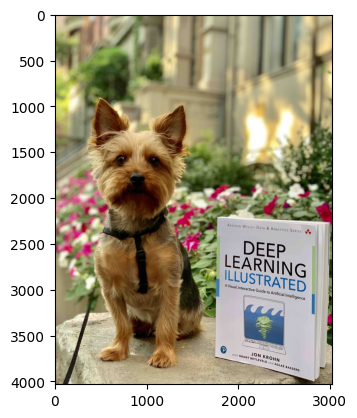

In [115]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

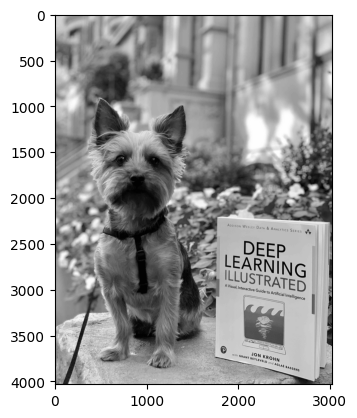

In [116]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

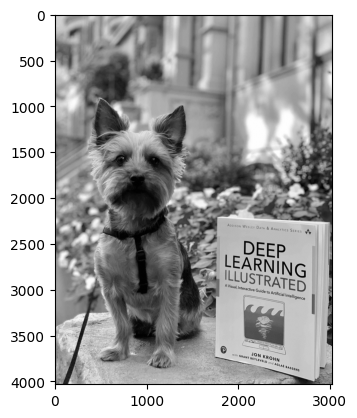

In [117]:
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat,cmap='gray')

calculando SVD da imagem

In [118]:
U, sigma, V = np.linalg.svd(imgmat)

o primeiro left-singular vetor de U e o primeiro right-singular vetor de V podem representar a característica mais proeminente da imagem.

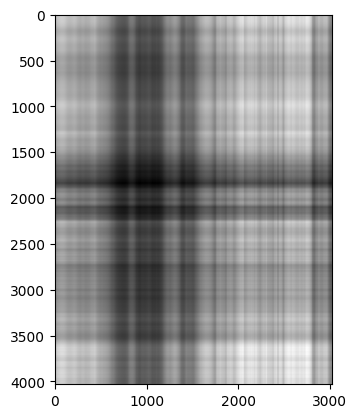

In [119]:
reconstimg = np.matrix(U[:,:1]) * np.diag(sigma[:1]) * np.matrix(V[:1,:])
_ = plt.imshow(reconstimg,cmap='gray')

vetores singulares adicionais melhoram a qualidade da imagem.

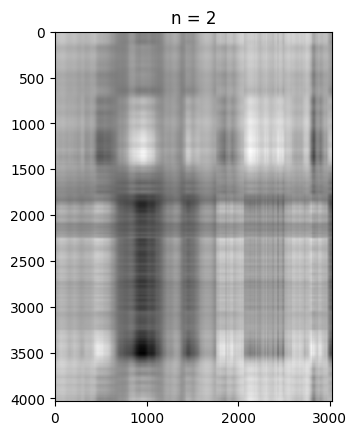

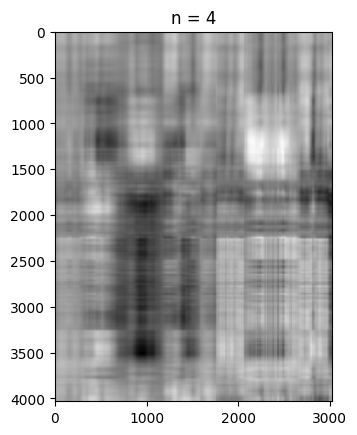

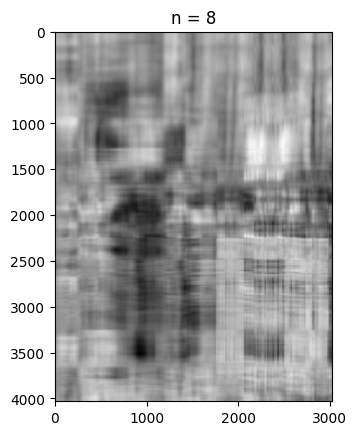

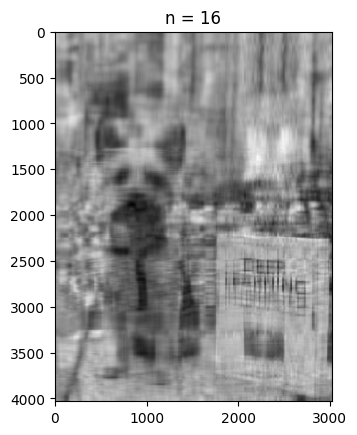

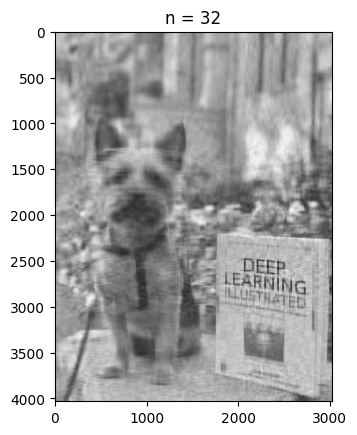

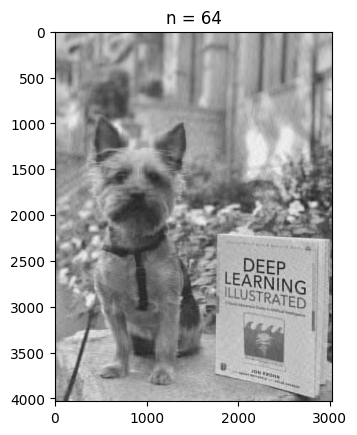

In [120]:
for i in [2,4,8,16,32,64]:
  reconstimg = np.matrix(U[:,:i]) * np.diag(sigma[:i]) * np.matrix(V[:i,:])
  plt.imshow(reconstimg,cmap='gray')
  title = "n = %s" % i
  plt.title(title)
  plt.show()

com 64 vetores, a imagem é reconstruída, mas o footprint de dados é bem menor que o da imagem original

In [121]:
imgmat.shape

(4032, 3024)

In [122]:
full_representation = 4032*3024
full_representation

12192768

In [123]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [124]:
svd64_rep/full_representation

0.037042286050222556

## Moore-Penrose Pseudoinverse

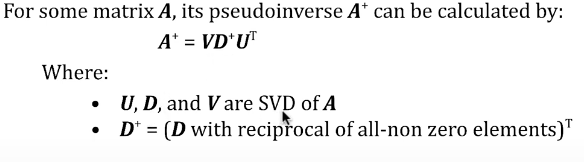

In [125]:
A = np.array([[-1,2],[3,-2], [5,7.]])
A

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

In [126]:
U,d, VT = np.linalg.svd(A)

In [127]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [128]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [129]:
d

array([8.66918448, 4.10429538])

para criar D+, primeiro invertemos os valores não-zero de d:

In [130]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [131]:
1/8.66918448, 1/4.10429538

(0.11535110393682613, 0.24364718116365203)

Como D é uma matriz diagonal, pode-se fazer em um só passo, invertendo D

In [132]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

D+ deve ter as mesmas dimensões de A transposta

In [133]:
Dplus = np.concatenate((Dinv, np.array([[0,0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [134]:
np.dot(VT.T, np.dot(Dplus,U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

numpy tem um método que faz tudo isto.

In [135]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

### Regression with Moore-Penrose Pseudoinverse

In [136]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [137]:
title = 'Clinical Trial'
xlabel = 'Drug dosage(mL)'
ylabel = 'Forgetfulness'

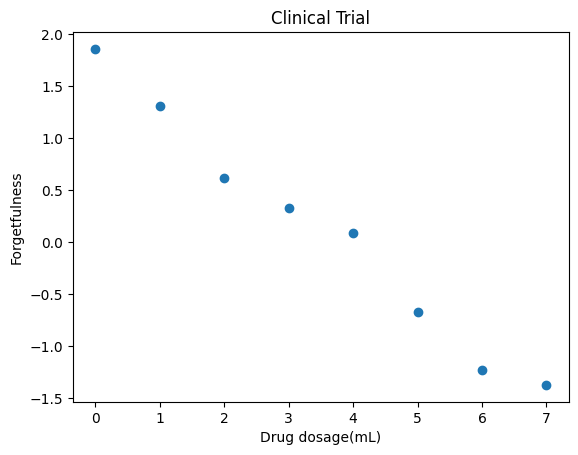

In [138]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)


Although it appears there is only one predictor (x1
), our model requires a second one (let's call it
x0) in order to allow for a
-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0).

In [139]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [140]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

In [141]:
w = np.dot(np.linalg.pinv(X), y) # solving weights with w = X**+ . y
w


matrix([[ 1.76      , -0.46928571]])

first weight corresponds to the y-intercept of the line, tipically denoted as b

In [142]:
b = np.asarray(w).reshape(-1)[0]
b

np.float64(1.7599999999999985)

second corresponds to the slope of the line, tipically m

In [143]:
m = np.asarray(w).reshape(-1)[1]
m

np.float64(-0.4692857142857139)

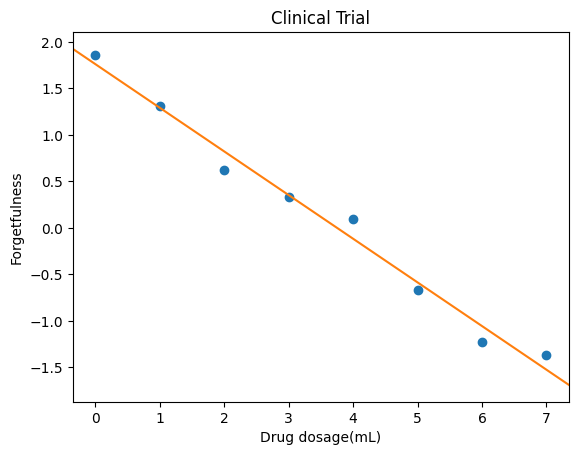

In [144]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim() # limites do gráfico
y_at_xmin = m*x_min + b # slope
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')


## Trace Operator

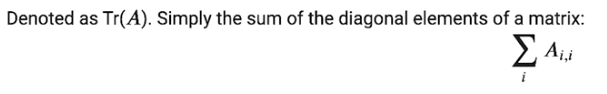

In [145]:
A = np.array([[25,2],[5,4]])
A

array([[25,  2],
       [ 5,  4]])

In [146]:
25 +4

29

In [147]:
np.trace(A)

np.int64(29)

* Tr($A$) = Tr($A^T$)
* Assuming the matrix shapes line up: Tr($ABC$) = Tr($CAB$) = Tr($BCA$)
In particular, the trace operator can provide a convenient way to calculate a matrix's Frobenius norm: $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

In [148]:
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [149]:
torch.trace(A_p)

tensor(-3.)

In [165]:
torch.norm(A_p, p='fro') # frobenius norm

tensor(5.)

In [166]:
(torch.trace(A_p@A_p.T))**(1/2) # frobenius norm com trace

tensor(5.)

## Principal Component Analysis (PCA)

Aprendizagem Não-supervisionada: identifica estrutura em unlabeled data

* Enables lossy compression
* First Principal Component contém most variance, second PC contains next most, etc

In [167]:
from sklearn import datasets
iris = datasets.load_iris()

In [168]:
iris.data.shape

(150, 4)

In [169]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [170]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [171]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [172]:
X = pca.fit_transform(iris.data)

In [173]:
X.shape #two principal components

(150, 2)

In [174]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

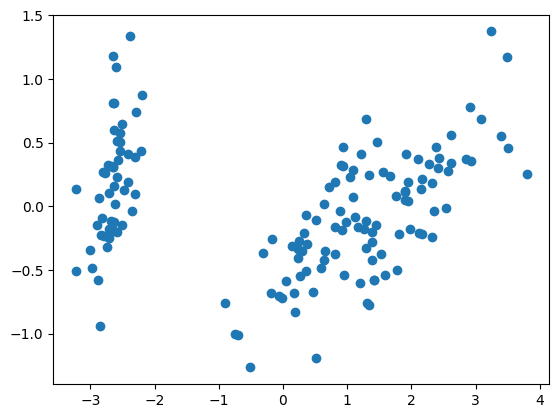

In [175]:
_ = plt.scatter(X[:,0], X[:,1])

In [176]:
iris.target.shape

(150,)

In [177]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [178]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements,counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [179]:
list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

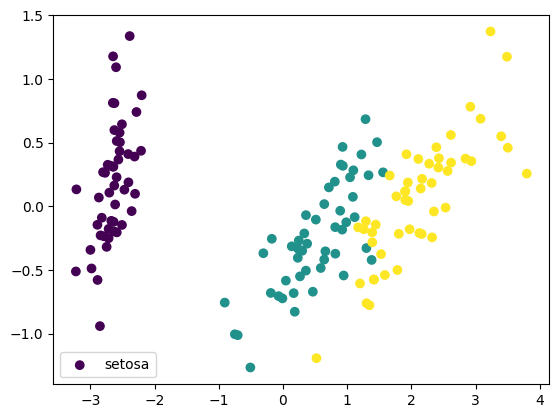

In [181]:
_ = plt.scatter(X[:,0], X[:,1], c=iris.target)
_ = plt.legend(list(iris.target_names))